## Python Project – 1: Analyzing Naming Trends using Python 

In [1]:
# Importing library to extract zip data
from io import BytesIO
from zipfile import ZipFile


# Importing visualizaion library
import matplotlib.pyplot as plt
%matplotlib inline

# Importing data manipulation libraries
import numpy as np
import pandas as pd

In [2]:
z = ZipFile('names.zip').extractall('.')


#read_csv('filename.csv')---->csv file syntax


#extracting the files----->step 2

#ZipFile('file_name.zip').extractall('.')------>syntax for extraction


In [3]:
z

Combining all files into a single DataFrame to carry out data manipulation and visualization tasks.

In [4]:
years = []
#step by step we always prefer for loop
for year in range(1880, 2021):
    years.append(pd.read_csv(f'yob{year}.txt', names = ['Name', 'gender', 'Babies']))
    years[-1]['Year'] = year

In [5]:
# Here is the first view of DataFrame

df = pd.concat(years)
df

,Name,gender,Babies,Year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
31266,Zykell,M,5,2020
31267,Zylus,M,5,2020
31268,Zymari,M,5,2020
31269,Zyn,M,5,2020


Making a pivot table to find out number of male and femable babies born in a particular year. A pivot table with Index of Year, columns with Sex and values with number of Babies born in each year will help us visualize the total number of babies born in each year. Since I have put Sex into index of pivot table all the years are grouped by each year making visualiztion easier.

In [6]:
df_pivot = pd.pivot_table(data=df, index=['Year'], columns=['gender'], values=['Babies'], aggfunc='sum')
df_pivot


#1880   4  1



#1880   1 2

#1880  5  3

Babies         
gender        F        M
Year                    
1880      90994   110490
1881      91953   100738
1882     107847   113686
1883     112319   104625
1884     129019   114442
...         ...      ...
2016    1768360  1893917
2017    1722140  1846154
2018    1695654  1810309
2019    1670419  1785527
2020    1598836  1706423

[141 rows x 2 columns]

Making a horizontal bar plot of above insights with figure height of 30 since the total number of years are 141.

<Figure size 720x2160 with 0 Axes>

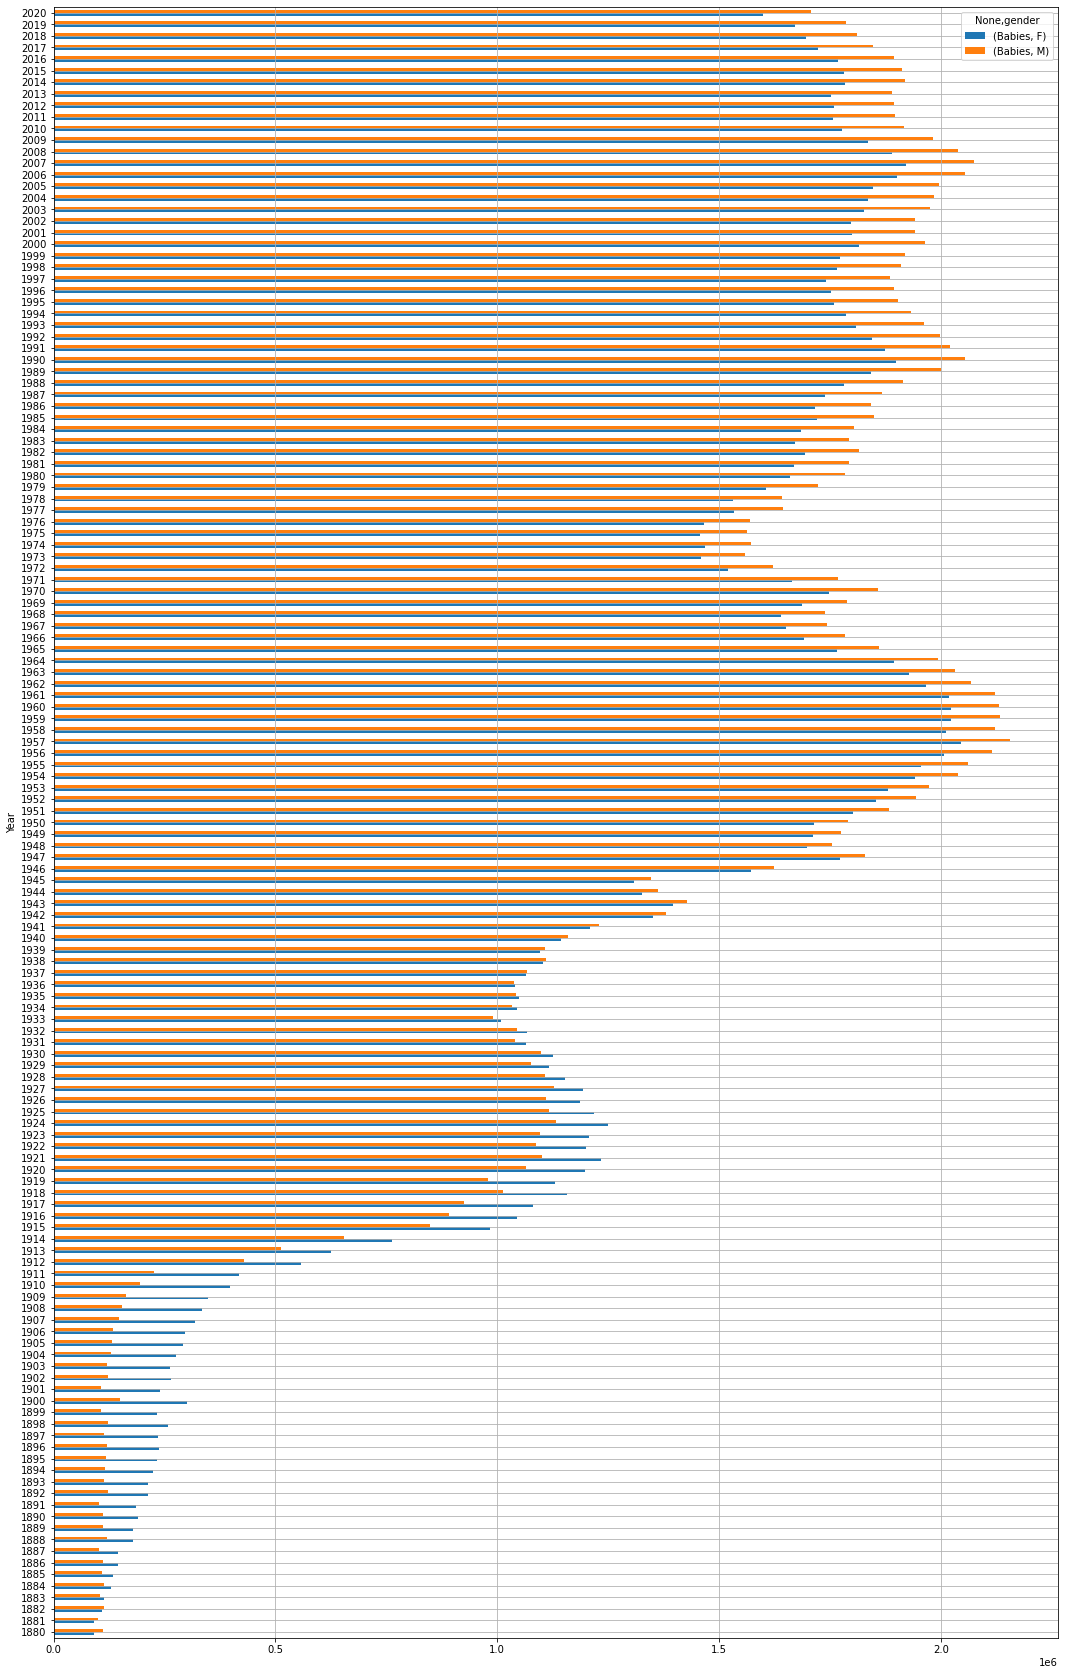

In [7]:
plt.figure(figsize=(10,30))
df_pivot.plot(kind='barh', figsize=(18,30), grid=True);

Here I'm analyzing baby names sorted by total number of births (Babies). Output is limited to 100 only.

In [8]:
pd.options.display.max_rows=100
sort_baby_names = df.sort_values(by='Babies', ascending=False).reset_index(drop=True)
sort_baby_names.head(100)


#10 b john
#15 g linda



,Name,gender,Babies,Year
0,Linda,F,99693,1947
1,Linda,F,96212,1948
2,James,M,94764,1947
3,Michael,M,92718,1957
4,Robert,M,91647,1947
5,Linda,F,91019,1949
6,Michael,M,90665,1956
7,Michael,M,90564,1958
8,James,M,88589,1948
9,Michael,M,88576,1954


Below is the top 100 baby names grouped by Name. It appears that total 7 number of names that makes the top 100 of baby names in all the years.

In [20]:
top_100_names = sort_baby_names.head(100)
grouped_names = top_100_names[['Name', 'Babies']].groupby('Name').sum().sort_values(by='Babies', ascending=False)
grouped_names

,Babies
Name,
James,1808522
Michael,1768255
John,1525009
Robert,1467401
David,978056
Linda,441334
Mary,219697
